<a href="https://colab.research.google.com/github/daphnephil/Crypto_Sentiment/blob/main/Lab4_OT_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE4410 - Cyber Security of Power Grids 🔐 ⚡
## Lab 4 🔬 - Operational Technology Network Traffic Analysis

## Student Details
### Name:
### ID/number:

**Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import seaborn as sns

# supress warning messages
warnings.filterwarnings('ignore')
sns.set_theme()

## Part 1: Network traffic time-series analysis




Load CSV file and select the protocols


In [ ]:
file_loc = 'dataset/goose.csv'
csv_data = pd.read_csv(file_loc)
# Convert 'Time' column to datetime
csv_data['Time'] = pd.to_datetime(csv_data['Time'])
# Calculate time difference from the first row in milliseconds
time_diff_ms = (csv_data['Time'] - csv_data['Time'].iloc[0]).dt.total_seconds() * 1000
# Replace 'Time' column with time difference in milliseconds
csv_data['Time'] = time_diff_ms
# Select rows where 'Protocol' is 'GOOSE'
goose = csv_data[csv_data['Protocol'].str.contains('GOOSE')]

In [ ]:
csv_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.0,131.180.164.100,131.180.5.38,SMB2,306,Create Request File: apresekal\\Code\\python-i...
1,2,0.0,131.180.164.100,131.180.5.38,SMB2,314,Create Request File: apresekal\\Code\\python-i...
2,3,0.0,131.180.5.38,131.180.164.100,SMB2,298,Create Response File: apresekal\\Code\\python-...
3,4,0.0,131.180.5.38,131.180.164.100,SMB2,298,Create Response File: apresekal\\Code\\python-...
4,5,0.0,131.180.164.100,131.180.5.38,TCP,54,63329 > 445 [ACK] Seq=513 Ack=489 Win=8207 L...


In [ ]:
goose.head()

,No.,Time,Source,Destination,Protocol,Length,Info
7,8,0.0,SiemensE_05:30:6d,Iec-Tc57_01:00:01,GOOSE,169,NaN
12,13,1000.0,UkGridSo_0c:6d:7a,Iec-Tc57_01:00:00,GOOSE,181,NaN
68,69,1000.0,SiemensE_05:30:61,Iec-Tc57_01:00:00,GOOSE,160,NaN
102,103,2000.0,UkGridSo_0c:6d:7a,Iec-Tc57_01:00:00,GOOSE,181,NaN
132,133,2000.0,SiemensE_05:30:6d,Iec-Tc57_01:00:01,GOOSE,169,NaN


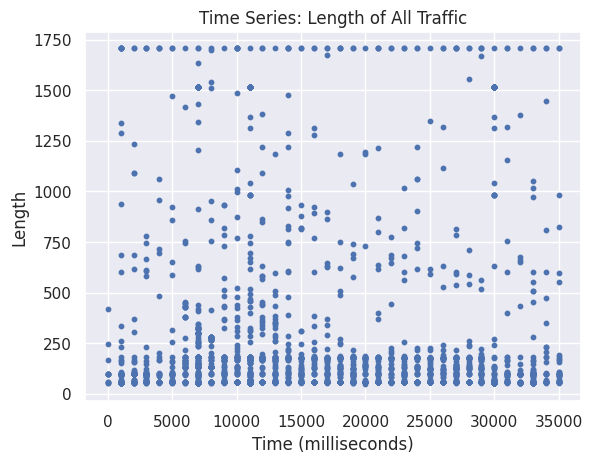

In [ ]:
# Plot the data for all traffic
plt.scatter(csv_data['Time'], csv_data['Length'], s=10)
plt.xlabel('Time (milliseconds)')
plt.ylabel('Length')
plt.title('Time Series: Length of All Traffic')
plt.grid(True)
plt.show()

Visualize clusters of the protocols by packet length and and arrival times

    Protocol     Time  Length
0        ARP  26000.0    60.0
1      GOOSE  17000.0   178.0
2    HSR/PRP  18000.0    66.0
3       HTTP  20500.0   981.0
4       ICMP  23000.0    60.0
5   IEEE802a  20000.0    60.0
6     IGMPv2  20500.0    60.0
7     IGMPv3  19000.0    62.0
8       LLDP  17000.0   292.0
9       NBSS  20000.0    60.0
10     PIMv2  14000.0    72.0
11     PTPv2  18500.0    96.0
12      SMB2   7000.0   182.0
13      SSDP  25500.0   217.0
14       STP  18000.0    60.0
15       TCP  14000.0    60.0
16   TLSv1.2  17000.0   183.5
17       UDP  18000.0    82.0


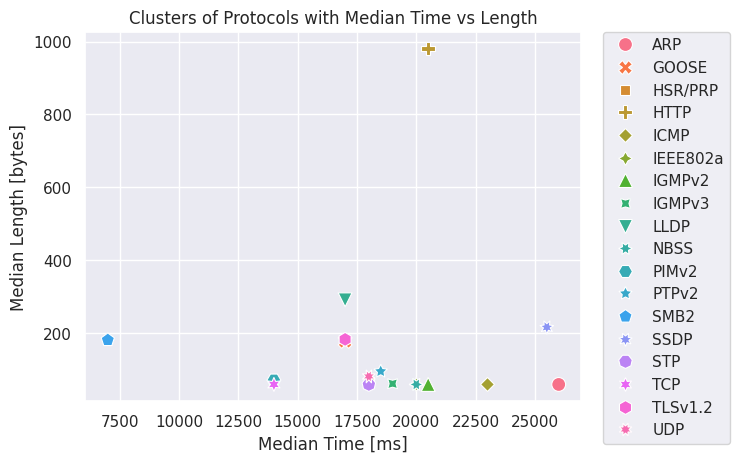

In [ ]:
# Grouping the data by 'Protocol' and calculating the median for 'Time' and 'Length'
median_data = csv_data.groupby('Protocol')[['Time', 'Length']].median().reset_index()
print(median_data)
# Plot the clusters
sns.scatterplot(data=median_data, x='Time', y='Length', hue='Protocol', style='Protocol', s=100)
plt.title('Clusters of Protocols with Median Time vs Length')
plt.xlabel('Median Time [ms]')
plt.ylabel('Median Length [bytes]')
# plt.xscale('log')
# plt.yscale('log')
# Adjusting legend to fit the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0)
plt.show()

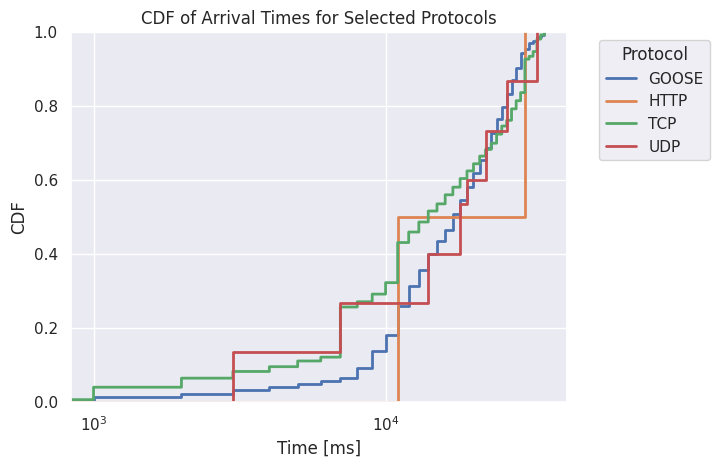

In [ ]:
# Filter the DataFrame to include only GOOSE, HTTP, TCP, and UDP protocols
selected_protocols = ['GOOSE', 'HTTP', 'TCP', 'UDP']
filtered_data = csv_data[csv_data['Protocol'].isin(selected_protocols)]

# Iterate over selected protocols and plot CDF for each
for protocol in selected_protocols:
    data = filtered_data[filtered_data['Protocol'] == protocol]['Time']
    sns.ecdfplot(data=data, linestyle='-', linewidth=2, label=protocol)
plt.title('CDF of Arrival Times for Selected Protocols')
plt.xlabel('Time [ms]')
plt.ylabel('CDF')
plt.xscale('log')
# Show legend
plt.legend(title='Protocol', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Box plots of packet lengths for select protocols

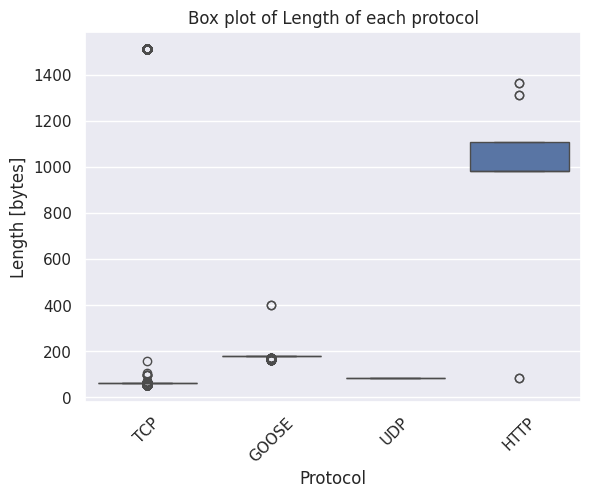

In [ ]:
# plt.figure(figsize=(10, 6))
sns.boxplot(x='Protocol', y='Length', data=filtered_data)
plt.title('Box plot of Length of each protocol')
plt.xlabel('Protocol')
plt.ylabel('Length [bytes]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

GOOSE analysis

In [ ]:
# Sort the DataFrame based on 'Source' and 'Time' columns
goose_sorted = goose.sort_values(by=['Source', 'Time'])
# Calculate the time difference for each unique source
goose_sorted['TimeDiff'] = goose_sorted.groupby('Source')['Time'].diff()
# Display the DataFrame with time differences
print(goose_sorted)

       No.     Time             Source        Destination Protocol  Length  \
68      69   1000.0  SiemensE_05:30:61  Iec-Tc57_01:00:00    GOOSE     160   
179    180   3000.0  SiemensE_05:30:61  Iec-Tc57_01:00:00    GOOSE     160   
252    253   5000.0  SiemensE_05:30:61  Iec-Tc57_01:00:00    GOOSE     160   
392    393   7000.0  SiemensE_05:30:61  Iec-Tc57_01:00:00    GOOSE     160   
635    636   9000.0  SiemensE_05:30:61  Iec-Tc57_01:00:00    GOOSE     160   
...    ...      ...                ...                ...      ...     ...   
2162  2163  33000.0  UkGridSo_0c:6d:7a  Iec-Tc57_01:00:00    GOOSE     181   
2254  2255  34000.0  UkGridSo_0c:6d:7a  Iec-Tc57_01:00:00    GOOSE     181   
2280  2281  35000.0  UkGridSo_0c:6d:7a  Iec-Tc57_01:00:00    GOOSE     181   
738    739  11000.0  UkGridSo_94:00:88  Iec-Tc57_01:01:00    GOOSE     400   
2094  2095  31000.0  UkGridSo_94:00:88  Iec-Tc57_01:01:00    GOOSE     400   

     Info  TimeDiff  
68    NaN       NaN  
179   NaN    2000.0

### Resample Time Series Data

In [ ]:
# Select two column only Time and Length
s_csv_data = csv_data[['Time', 'Length']]
s_goose = goose[['Time', 'Length']]

# Set time unit to ms
s_csv_data['Time'] = pd.to_datetime(s_csv_data['Time'], unit='ms')
s_goose['Time'] = pd.to_datetime(s_goose['Time'], unit='ms')
# Set 'Time' column as the index
s_csv_data.set_index('Time', inplace=True)
s_goose.set_index('Time', inplace=True)

# Resample the DataFrame into 100 ms intervals and sum the 'Length' values
s_csv_data = s_csv_data.resample('100L').sum()
s_goose = s_goose.resample('100L').sum()

# Fill NaN values with 0 (in case there are no data points in some intervals)
s_csv_data['Length'] = s_csv_data['Length'].fillna(0)
s_goose['Length'] = s_goose['Length'].fillna(0)

# Reset index to turn the datetime index into a column
s_csv_data.reset_index(inplace=True)
s_goose.reset_index(inplace=True)

# Calculate time difference from the first row in milliseconds
s_csv_data['Time'] = (s_csv_data['Time'] - s_csv_data['Time'].iloc[0]).dt.total_seconds() * 1000
s_goose['Time'] = (s_goose['Time'] - s_goose['Time'].iloc[0]).dt.total_seconds() * 1000

All traffic resampled

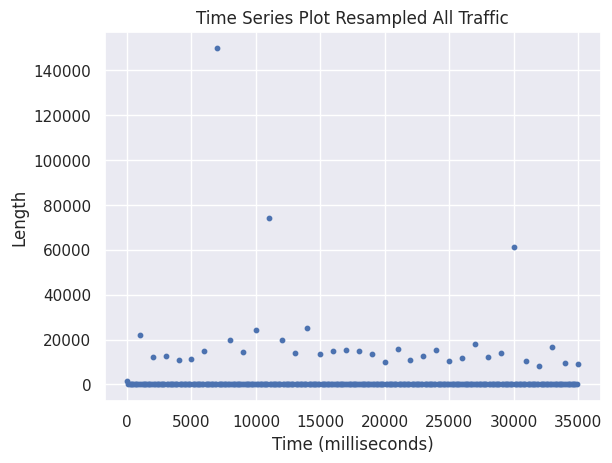

In [ ]:
# Plot the data for all traffic
plt.scatter(s_csv_data['Time'], s_csv_data['Length'], s=10)
plt.xlabel('Time (milliseconds)')
plt.ylabel('Length')
plt.title('Time Series Plot Resampled All Traffic')
plt.grid(True)
plt.show()

GOOSE resampled

## Part 2: Traffic Dispersion Graph

Default traffic dispersion graph

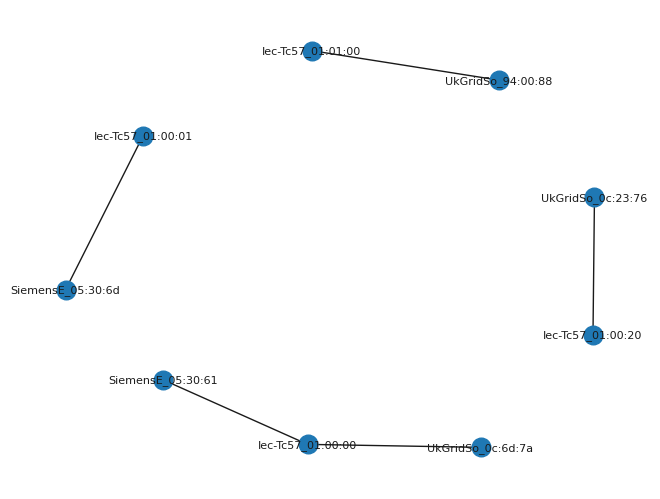

In [ ]:
# Create a Graph from DataFrame
G = nx.from_pandas_edgelist(goose, 'Source', 'Destination')
# Use spring layout with fixed positions
pos = nx.spring_layout(G, k=7.5)  # Adjust the value of k to increase spacing
# plot the graph
nx.draw(G, pos, with_labels=True, node_size=180, font_size=8)
plt.show()

Add switches to the graph and plot

## Assignment 📚


### Part 1: Network traffic time-series analysis
1. Plot the traffic data from the provided csv files
- Visualize and analyze the differences **between IT (HTTP, UDP, and TCP) and OT (GOOSE) protocols**  present in the dataset.
  (Hint: try using *scatter*, *box* plots). Comment on the differences and characteristics of the protocols.
- Limit the visualization to protocol type `GOOSE`. Is the signal cyclic? **Explain why or why not?**


2. Perform resampling of the times-series data to merge the length of every $x$ miliseconds and plot the result.
- Plot different variations of resampling time, for example, $x =(100, 200, 500, 1000, 2000)$ etc.
- Show the plot for the best resampling time for all protocols
- Show the plot for the best resampling time for `GOOSE` only

3. Based on the plot results and CSV files, compare and comment on the characteristics and differences between IT (HTTP, UDP, and TCP) and OT (GOOSE) protocols.

4. Analyze and compare the traffic from all CSV files. Which file is most likely to contain anomalous traffic?  

Support your answers with representative plots! 📊 📈 📉

### Part 2: Traffic Dispersion Graph
For this part, limit the focus to `GOOSE` protocol

1. Plot graphs from the CSV files using `Networkx`. Sources and destinations in the CSV files serve as edge lists for the `Networkx` graph.

2. Modify the graph by adding switch nodes. All the traffic flows via the switch node.

3. How many total nodes/devices exist for each graph?

Briefly identify and explain the nodal characteristics for each graph 🕸